## Train and Prediction on all data

Using rotated to hz + OpenCv border

Basic default transforms

In [172]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [173]:
from fastai.vision import *
import geopandas as gpd
from resizeimage import resizeimage
import datetime
import uuid
from os import listdir
from os.path import isfile, join
from fastai_extensions import *

In [174]:
torch.cuda.set_device(1)
torch.cuda.current_device()

1

In [175]:
data_dir = Path('data')
data_04 = Path('data_04')

In [176]:
MODEL_NAME='bg_const'

In [177]:
NB_NUM='03_28'

In [178]:
DATE = datetime.datetime.today().strftime('%Y%m%d')
UID=str(uuid.uuid4())[:8]
print(f'UID: {UID}, DATE: {DATE}')                                                 

UID: e16cd0f1, DATE: 20191201


In [179]:
DATE = '20191201'
UID = '0c79e3be'

In [180]:
SUB_NUM='30'

In [181]:
img_size=256
bs=128
background='constant'

In [182]:
train_images=data_04/f'train/rotated/clipped/constant/{img_size}'
test_images=data_04/f'test/rotated/clipped/constant/{img_size}'

In [183]:
train_names = get_image_files(train_images)

In [184]:
test_names = get_image_files(test_images)

### using valid + gold preds instead of all

In [185]:
df_gold=pd.read_csv(data_dir/'df_all_repl_st_lucia_castries_gold_concrete_cement.csv')

In [186]:
df_gold.drop(columns=['target'],inplace=True)

In [187]:
df_gold=df_gold[['id','roof_material','verified','country','region']]

In [188]:
df_gold.tail()

,id,roof_material,verified,country,region
22534,7a3585be,concrete_cement,True,st_lucia,castries
22535,7a1d3324,concrete_cement,True,st_lucia,castries
22536,7a30849c,concrete_cement,True,st_lucia,castries
22537,7a27186c,concrete_cement,True,st_lucia,castries
22538,7a34ef78,concrete_cement,True,st_lucia,castries


In [189]:
df_pewter_70pct=pd.read_csv(data_dir/'st_lucia_castries_gros_islet_70pct_rn50-rn152-dn121_preds.csv')

In [190]:
df_pewter_70pct.tail()

,id,roof_material,verified,country,region
3364,7a3a5eea,other,True,st_lucia,gros_islet
3365,7a3b3dce,other,True,st_lucia,castries
3366,7a3cfda8,other,True,st_lucia,gros_islet
3367,7a42d1a6,other,True,st_lucia,gros_islet
3368,7a4494c8,other,True,st_lucia,gros_islet


In [191]:
frames = [df_gold, df_pewter_70pct]

df_gold_pewter = pd.concat(frames)

In [192]:
#### test data

In [193]:
df_test=pd.read_csv(data_dir/'df_test_all.csv')

In [194]:
df_test.tail()

,id,country,region
7320,7a4f3ff4,st_lucia,dennery
7321,7a4fc578,st_lucia,dennery
7322,7a4ac7b2,st_lucia,dennery
7323,7a47e25e,st_lucia,dennery
7324,7a4e3f78,st_lucia,dennery


In [195]:
assert len(df_test)==7325

In [196]:
gp_ids=df_gold_pewter.id.values.tolist()

In [197]:
train_names[0:10]

[PosixPath('data_04/train/rotated/clipped/constant/256/7a2726ae_256_reflect.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a1fa6f4_256_bgconstant.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a37f9b6_zoom.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a1d17fe_256_reflect.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a29b036_256_wrap.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a3e757a_256_wrap.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a3bd810_256_wrap.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a2f73ea_256_reflect.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a2e1658_256_wrap.tif'),
 PosixPath('data_04/train/rotated/clipped/constant/256/7a208484_raw.tif')]

In [198]:
trn_file_names=[]
for f in train_names:
    trn_file_names.append(f.name.split('.tif')[0])

In [199]:
trn_file_names[0:10]

['7a2726ae_256_reflect',
 '7a1fa6f4_256_bgconstant',
 '7a37f9b6_zoom',
 '7a1d17fe_256_reflect',
 '7a29b036_256_wrap',
 '7a3e757a_256_wrap',
 '7a3bd810_256_wrap',
 '7a2f73ea_256_reflect',
 '7a2e1658_256_wrap',
 '7a208484_raw']

In [200]:
bg_const_names=[]
for f in trn_file_names:
    if '_256_bgconstant' in f:
        bg_const_names.append(f.split('_256_bgconstant')[0])
        
raw_names=[]
for f in trn_file_names:
    if '_raw' in f:
        raw_names.append(f.split('_raw')[0])
        
zoom_names=[]
for f in trn_file_names:
    if '_zoom' in f:
        zoom_names.append(f.split('_zoom')[0])
        
reflect_names=[]
for f in trn_file_names:
    if '_256_reflect' in f:
        reflect_names.append(f.split('_256_reflect')[0])
        
wrap_names=[]
for f in trn_file_names:
    if '_256_wrap' in f:
        wrap_names.append(f.split('_256_wrap')[0])


In [201]:
df_gold_pewter_bg_const=df_gold_pewter.loc[df_gold_pewter['id'].isin(bg_const_names)]

In [202]:
df_gold_pewter_bg_const['id']=df_gold_pewter_bg_const['id']+'_256_bgconstant'

In [203]:
df_gold_pewter_bg_const.head()

,id,roof_material,verified,country,region
0,7a3f2a10_256_bgconstant,concrete_cement,True,colombia,borde_rural
1,7a1f731e_256_bgconstant,irregular_metal,True,colombia,borde_rural
2,7a424ad8_256_bgconstant,healthy_metal,True,colombia,borde_rural
3,7a3edc5e_256_bgconstant,healthy_metal,True,colombia,borde_rural
4,7a303a6e_256_bgconstant,healthy_metal,True,colombia,borde_rural


In [204]:
df_gold_pewter_bg_const=df_gold_pewter_bg_const.drop_duplicates(subset=['id'])

Ensure is only ids with _256_bgconstant

In [205]:
len(bg_const_names)

22553

In [206]:
#### raw

In [207]:
len(raw_names)

22553

In [208]:
df_gold_pewter_raw=df_gold_pewter.loc[df_gold_pewter['id'].isin(raw_names)]

In [209]:
df_gold_pewter_raw['id']=df_gold_pewter_raw['id']+'_raw'

In [210]:
df_gold_pewter_raw.head()

,id,roof_material,verified,country,region
0,7a3f2a10_raw,concrete_cement,True,colombia,borde_rural
1,7a1f731e_raw,irregular_metal,True,colombia,borde_rural
2,7a424ad8_raw,healthy_metal,True,colombia,borde_rural
3,7a3edc5e_raw,healthy_metal,True,colombia,borde_rural
4,7a303a6e_raw,healthy_metal,True,colombia,borde_rural


In [211]:
len(df_gold_pewter_raw)

25908

In [212]:
df_gold_pewter_raw=df_gold_pewter_raw.drop_duplicates(subset=['id'])

In [213]:
#### zoom

In [214]:
len(zoom_names)

2234

In [215]:
df_gold_pewter_zoom=df_gold_pewter.loc[df_gold_pewter['id'].isin(zoom_names)]

In [216]:
df_gold_pewter_zoom['id']=df_gold_pewter_zoom['id']+'_zoom'

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [217]:
df_gold_pewter_zoom.head()

,id,roof_material,verified,country,region
64,7a42454c_zoom,concrete_cement,True,colombia,borde_rural
72,7a407a64_zoom,irregular_metal,True,colombia,borde_rural
73,7a41a984_zoom,irregular_metal,True,colombia,borde_rural
94,7a320e20_zoom,irregular_metal,True,colombia,borde_rural
184,7a34bb84_zoom,irregular_metal,True,colombia,borde_rural


In [218]:
len(df_gold_pewter_zoom)

2632

In [219]:
df_gold_pewter_zoom=df_gold_pewter_zoom.drop_duplicates(subset=['id'])

In [220]:
len(df_gold_pewter_zoom)

2232

In [221]:
#### wrap

In [222]:
len(wrap_names)

22553

In [223]:
df_gold_pewter_wrap=df_gold_pewter.loc[df_gold_pewter['id'].isin(wrap_names)]

In [224]:
df_gold_pewter_wrap['id']=df_gold_pewter_wrap['id']+'_256_wrap'

In [225]:
df_gold_pewter_wrap.head()

,id,roof_material,verified,country,region
0,7a3f2a10_256_wrap,concrete_cement,True,colombia,borde_rural
1,7a1f731e_256_wrap,irregular_metal,True,colombia,borde_rural
2,7a424ad8_256_wrap,healthy_metal,True,colombia,borde_rural
3,7a3edc5e_256_wrap,healthy_metal,True,colombia,borde_rural
4,7a303a6e_256_wrap,healthy_metal,True,colombia,borde_rural


In [226]:
len(df_gold_pewter_wrap)

25908

In [227]:
df_gold_pewter_wrap=df_gold_pewter_wrap.drop_duplicates(subset=['id'])

In [228]:
#### reflect

In [229]:
len(reflect_names)

22553

In [230]:
df_gold_pewter_reflect=df_gold_pewter.loc[df_gold_pewter['id'].isin(reflect_names)]

In [231]:
df_gold_pewter_reflect['id']=df_gold_pewter_reflect['id']+'_256_reflect'

In [232]:
df_gold_pewter_reflect.head()

,id,roof_material,verified,country,region
0,7a3f2a10_256_reflect,concrete_cement,True,colombia,borde_rural
1,7a1f731e_256_reflect,irregular_metal,True,colombia,borde_rural
2,7a424ad8_256_reflect,healthy_metal,True,colombia,borde_rural
3,7a3edc5e_256_reflect,healthy_metal,True,colombia,borde_rural
4,7a303a6e_256_reflect,healthy_metal,True,colombia,borde_rural


In [233]:
len(df_gold_pewter_reflect)

25908

In [234]:
df_gold_pewter_reflect=df_gold_pewter_reflect.drop_duplicates(subset=['id'])

append them all

In [235]:
frames = [df_gold_pewter_bg_const, df_gold_pewter_reflect, df_gold_pewter_wrap, df_gold_pewter_zoom]

df_gold_pewter = pd.concat(frames)

In [236]:
len(df_gold_pewter)

69849

### split df manally

Getting leakage across validation as images are very similar



In [237]:
df_val = df_gold_pewter.sample(frac=0.07)

In [238]:
df_val_ids=df_val.id.values.tolist()

In [239]:
len(df_val_ids)

4889

In [240]:
core_ds=[]
for id in df_val_ids:
    core_ds.append(id.split('_')[0])

In [241]:
core_ds=list(set(core_ds))

In [242]:
len(core_ds)

4541

In [243]:
df_val=df_gold_pewter[df_gold_pewter['id'].str.contains('|'.join(core_ds))]
df_train=df_gold_pewter[~df_gold_pewter['id'].str.contains('|'.join(core_ds))]

In [244]:
df_val['is_valid']=True
df_train['is_valid']=False

/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/walle/miniconda3/envs/fastai-dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [245]:
len(df_train)

55661

In [246]:
frames = [df_val, df_train]

df_train = pd.concat(frames)

In [247]:
len(df_gold_pewter)

69849

Want 10-20%, adjust frac above accordingly

In [248]:
len(df_val)/len(df_gold_pewter)

0.20312388151584132

To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageList` (and not `ImageDataBunch`). This will make sure the model created has the proper loss function to deal with the multiple classes.

In [249]:
cutout_1=cutout(n_holes=(1,4), length=(10, 20), p=.5)
cutout_2=cutout(n_holes=(1,4), length=(20, 30), p=.5)
cutout_3=cutout(n_holes=(1,4), length=(20,20), p=.6)
cutout_4=cutout(n_holes=(1,4), length=(40,40), p=.6)
xtra_tfms=[cutout_1,cutout_2,cutout_3,cutout_4, rand_crop(p=0.4), rand_zoom(scale=(1.,1.5),p=0.4)]
tfms = get_transforms(flip_vert=True, max_lighting=0.25, max_warp=0., xtra_tfms=xtra_tfms)

### setup dataset

In [250]:
np.random.seed(42)
dep_var='roof_material'
src = (ImageList.from_df(path=train_images, df=df_train, cols='id', suffix='.tif')
       #.split_by_rand_pct(0.1)
       .split_from_df(col='is_valid')
      .label_from_df(cols=dep_var)
      .add_test_folder(test_images))

69849


In [251]:
data = (src.transform(tfms, size=img_size)
        .databunch(bs=bs).normalize(imagenet_stats))

In [252]:
#to check what params object has
#dir(data)

In [253]:
data.label_list

LabelLists;

Train: LabelList (55661 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,irregular_metal,healthy_metal,healthy_metal,healthy_metal
Path: data_04/train/rotated/clipped/constant/256;

Valid: LabelList (14188 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
healthy_metal,healthy_metal,irregular_metal,healthy_metal,healthy_metal
Path: data_04/train/rotated/clipped/constant/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data_04/train/rotated/clipped/constant/256

In [254]:
data.loss_func

FlattenedLoss of CrossEntropyLoss()

`show_batch` still works, and show us the different labels separated by `;`.

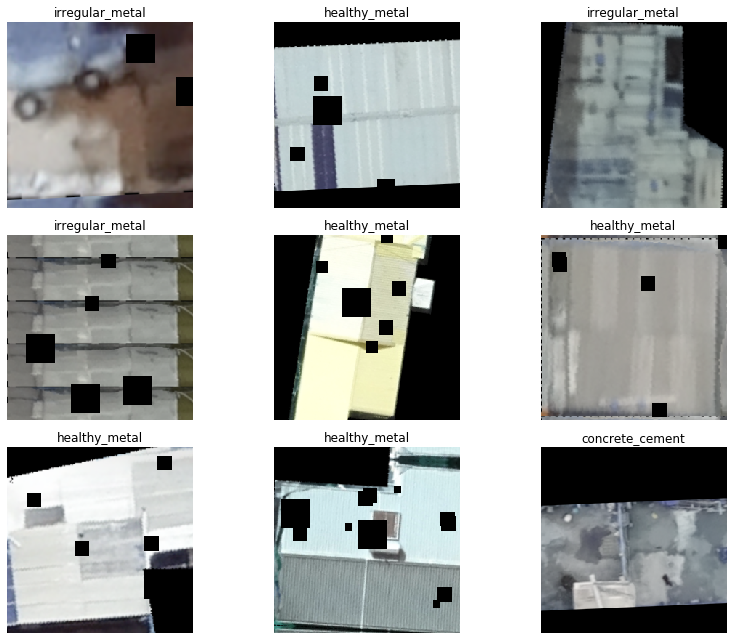

In [255]:
data.show_batch(rows=3, figsize=(12,9))

### Model

In [256]:
arch = models.resnet50
arch_name = 'rn50'

In [257]:
learn = cnn_learner(data, arch, metrics=error_rate, bn_final=True).to_fp16()

We use the LR Finder to pick a good learning rate.

### Train model

In [129]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


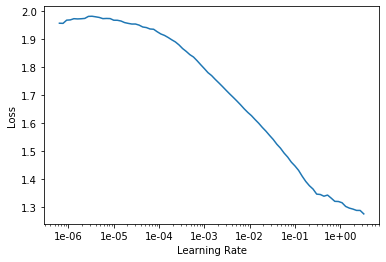

In [130]:
learn.recorder.plot()

Then we can fit the head of our network.

In [131]:
lr = 1e-2

In [132]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.584632,0.459880,0.144517,02:33
1,0.416285,0.367453,0.131290,02:33
2,0.363740,0.349504,0.127511,02:33
3,0.346220,0.338792,0.122052,02:38
4,0.328226,0.333296,0.120652,03:09


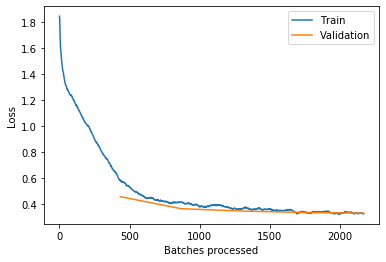

In [133]:
learn.recorder.plot_losses()

<pre>
03_1 results

epoch 	train_loss 	valid_loss 	error_rate 	time
0 	0.508273 	1.170024 	0.339911 	01:16
1 	0.471699 	0.494651 	0.166297 	01:22
2 	0.439157 	0.417086 	0.152328 	01:23
3 	0.402381 	0.370002 	0.127938 	01:23
4 	0.355355 	0.360440 	0.126608 	01:22
    </pre>

In [134]:
learn.save(f'stage-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')


#### Load model

In [135]:
learn.load(f'stage-1-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (55560 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,healthy_metal,healthy_metal,healthy_metal,healthy_metal
Path: data_04/train/rotated/clipped/constant/256;

Valid: LabelList (14289 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
irregular_metal,healthy_metal,healthy_metal,healthy_metal,irregular_metal
Path: data_04/train/rotated/clipped/constant/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data_04/train/rotated/clipped/constant/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1

In [136]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('irregular_metal', 'healthy_metal', 562),
 ('healthy_metal', 'irregular_metal', 346),
 ('incomplete', 'irregular_metal', 190),
 ('concrete_cement', 'healthy_metal', 141),
 ('other', 'healthy_metal', 129),
 ('healthy_metal', 'concrete_cement', 78),
 ('incomplete', 'concrete_cement', 55),
 ('irregular_metal', 'concrete_cement', 42),
 ('incomplete', 'healthy_metal', 41),
 ('other', 'irregular_metal', 33),
 ('concrete_cement', 'irregular_metal', 31),
 ('irregular_metal', 'incomplete', 22),
 ('healthy_metal', 'incomplete', 15),
 ('irregular_metal', 'other', 13),
 ('concrete_cement', 'incomplete', 12),
 ('other', 'concrete_cement', 8),
 ('concrete_cement', 'other', 3),
 ('healthy_metal', 'other', 3)]

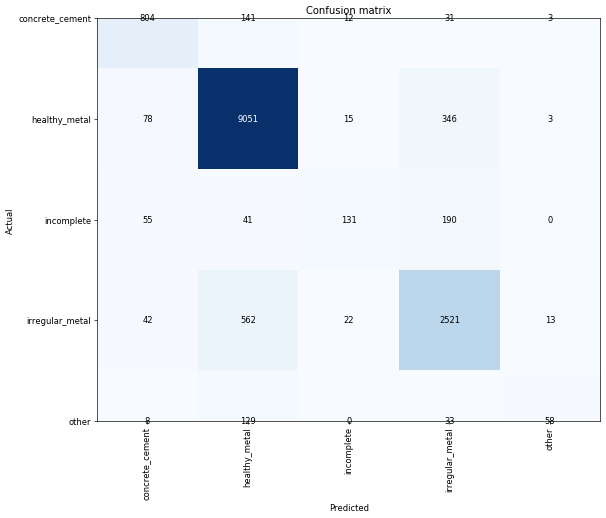

In [137]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

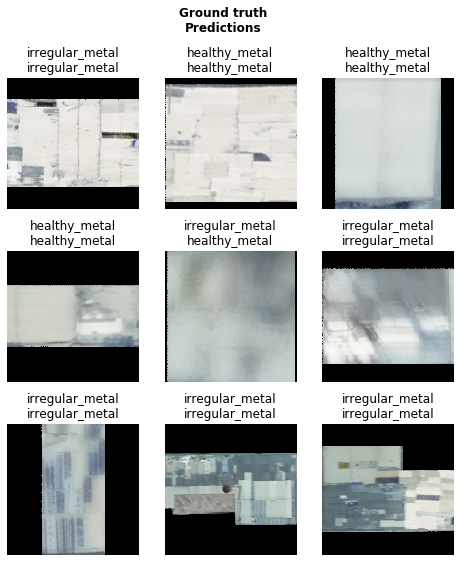

In [138]:

learn.show_results(rows=3, figsize=(8,9))

### Re-train

In [139]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


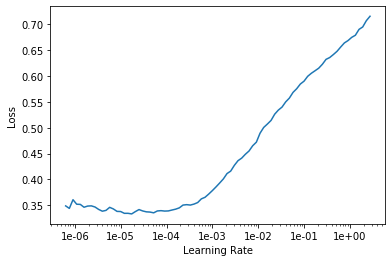

In [140]:
learn.lr_find()
learn.recorder.plot()

In [141]:
learn.fit_one_cycle(5, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.328173,0.342037,0.124921,04:23
1,0.315965,0.343467,0.125551,04:17
2,0.293122,0.339531,0.119183,04:17
3,0.247186,0.352286,0.121492,03:44
4,0.222728,0.354143,0.122122,04:11


In [142]:
learn.save(f'stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

In [143]:
learn.load(f'stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

Learner(data=ImageDataBunch;

Train: LabelList (55560 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
concrete_cement,healthy_metal,healthy_metal,healthy_metal,healthy_metal
Path: data_04/train/rotated/clipped/constant/256;

Valid: LabelList (14289 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
irregular_metal,healthy_metal,healthy_metal,healthy_metal,irregular_metal
Path: data_04/train/rotated/clipped/constant/256;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data_04/train/rotated/clipped/constant/256, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1

In [144]:
learn.fit_one_cycle(5, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.243632,0.379106,0.128001,03:48
1,0.247606,0.382903,0.131010,04:02
2,0.212410,0.392562,0.127651,04:08
3,0.173500,0.407779,0.129960,04:09
4,0.155235,0.410895,0.128490,04:10


<pre>
03_1

 epoch 	train_loss 	valid_loss 	error_rate 	time
0 	0.344736 	0.349004 	0.125277 	01:27
1 	0.343708 	0.355190 	0.129047 	01:15
2 	0.351904 	0.371296 	0.131042 	01:14
3 	0.346994 	0.346989 	0.123947 	01:14
4 	0.323809 	0.346372 	0.126608 	01:15
</pre>

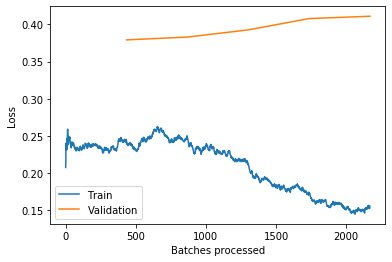

In [145]:
learn.recorder.plot_losses()

In [146]:
learn.save(f'stage-2-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}')

In [147]:
learn=learn.to_fp32()

In [148]:
learn.export(f'stage-2-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.pkl')

### inference

In [277]:
def generate_pickles(learn, stages_end, runs_end):
    for run in range(runs_end):
        for stage in range(1,stages_end):
            learn.load(f'stage-{stage}-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}-{run}')
            learn=learn.to_fp32()
            learn.export(f'stage-{stage}-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}-{run}.pkl')

In [267]:
#test_images=data_dir/f'test/rotated/clipped/{img_size}'
test_dataset=ImageList.from_folder(test_images)

In [268]:
len(test_dataset)

29756

In [269]:
def get_pred_df(learn):
    preds,y= learn.get_preds(ds_type=DatasetType.Test)
    labels = np.argmax(preds, 1)
    preds_list=[]
    for pred in preds:
        preds_list.append(pred.tolist())
    test_predictions = [learn.data.classes[int(x)] for x in labels]
    ids=[]
    for item in learn.data.test_ds.x.items:
        base, id = os.path.split(item)
        id = id.split('.tif')[0]
        ids.append(id)
    cols = learn.data.classes.copy()
    cols.insert(0,'id')
    df = pd.DataFrame(list(zip(ids, preds_list)), 
                           columns =['id', 'pred']) 
    pred_df = pd.DataFrame(df['pred'].values.tolist())
    pred_df.insert(loc=0, column='id', value=ids)
    pred_df.columns = cols
    return pred_df

In [270]:
def format_preds(pred_df):
    pred_ids=pred_df['id'].values.tolist()
    df_baseline = pd.read_csv(data_dir/f'submissions/mean_baseline.csv')
    baseline_ids=df_baseline['id'].values.tolist()
    assert set(pred_ids)==set(baseline_ids)
    pred_df['id_cat'] = pd.Categorical(
        pred_df['id'], 
        categories=baseline_ids, 
        ordered=True
    )
    pred_df=pred_df.sort_values('id_cat')
    pred_df.drop(columns=['id_cat'],inplace=True)
    pred_df=pred_df.drop_duplicates(subset=['id'])
    return pred_df

In [271]:
def average_preds(df_list):
    df_concat = pd.concat(df_list)
    print(f'concatenated: {df_concat.head(n=2)}')
    by_row_id = df_concat.groupby(df_concat.id)
    df_means = by_row_index.mean()
    df_means['Sum'] = df_means.sum(axis=1)
    df_means.drop(columns=['Sum'],inplace=True)
    cols=['id','concrete_cement',
     'healthy_metal',
     'incomplete',
     'irregular_metal',
     'other']
    df_means = df_means[cols]
    print(f'means: {df_means.head(n=2)}')
    return df_means

In [272]:
def save_preds(pred_df, stages):
    print(f'saving to submissions/ensembled-{stages}-stages-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.csv')
    pred_df.to_csv(data_dir/f'submissions/ensembled-{stages}-stages-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.csv', index=False)

In [274]:
arch = models.resnet50
arch_name = 'rn50'

In [275]:
learn = cnn_learner(data, arch, metrics=error_rate, bn_final=True).to_fp16()

In [278]:
generate_pickles(learn, stages_end, runs_end)

FileNotFoundError: [Errno 2] No such file or directory: 'data_04/train/rotated/clipped/constant/256/models/stage-1-rn50-03_28-bg_const-20191201-0c79e3be-0.pth'

In [273]:
df_list=[]
stages_end=3
runs_end=10

for i in range(runs_end):
    for stage in range(1,stages_end):
        learn = load_learner(path=test_images, file=f'stage-{stage}-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}-{i}.pkl', test=test_dataset)
        pred_df=get_pred_df(learn)
        df_list.append(pred_df)
df_means=average_preds(df_list)
pred_df=format_preds(df_means)
save_preds(pred_df, stages_end-1)

UnboundLocalError: local variable 'learn' referenced before assignment

### Submission 35: 0.4642


In [92]:
arch_name = 'rn50'
pred_df=pd.read_csv(data_dir/f'submissions/stage-2-{arch_name}-{NB_NUM}-{MODEL_NAME}-{DATE}-{UID}.csv')

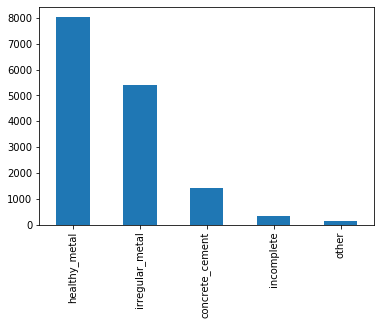

In [88]:
pred_df.drop(columns=['id'],inplace=True)
classes=pred_df.idxmax(axis=1)
pd.value_counts(classes).plot(kind="bar")